In [1]:
import psycopg2.extras
import pytz
from configparser import ConfigParser
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import folium
from folium.plugins import HeatMap


In [2]:
#sign into database


In [3]:
#db to list to df for heatmap
def heatmap_df(case,month_num):
    with conn.cursor() as cursor:
        print('PostgreSQL database version:')
        cursor.execute('SELECT version()')
        # display the PostgreSQL database server version
        db_version = cursor.fetchone()
        
        #executes the sql query (2 situation, case 1 -> exact month, else all months before x
        if case == 1:
            cursor.execute ("select coordinates ,log_time, log_type, log_area from chp_incident Where log_type not like %s and coordinates != '(0,0)' and extract('month' from log_time) = %s ",("%Advisory%", month_num))
        else:
            cursor.execute ("select coordinates ,log_time, log_type, log_area from chp_incident Where log_type not like %s and coordinates != '(0,0)' and extract('month' from log_time) < %s ",("%Advisory%", month_num))
    
        list = cursor.fetchall()

        df = pd.DataFrame(list, columns = ['coordinates','log_time','log_type' , 'log_area'])   
        
        # extracts the numbers only with regex
        df[['Latitude', 'Longitude']] = df['coordinates'].str.extract(r'\((.*),(.*)\)')
            
        # Strip any leading/trailing spaces from latitude and longitude columns
        df['Latitude'] = df['Latitude'].str.strip().astype(float)
        df['Longitude'] = df['Longitude'].str.strip().astype(float)

        return df
        

#creating heatmap
def heatmap(df,title,html_title):
    fig = px.density_mapbox(df,
                            lat = 'Latitude', 
                            lon = 'Longitude', 
                            radius = 1, 
                            center = dict(lat=df.Latitude.mean(), lon = df.Longitude.mean()),
                            zoom=5, 
                            mapbox_style= 'open-street-map',
                            height=1000, 
                            title = title)
    fig.show()
    fig.write_html(html_title)
    


PostgreSQL database version:


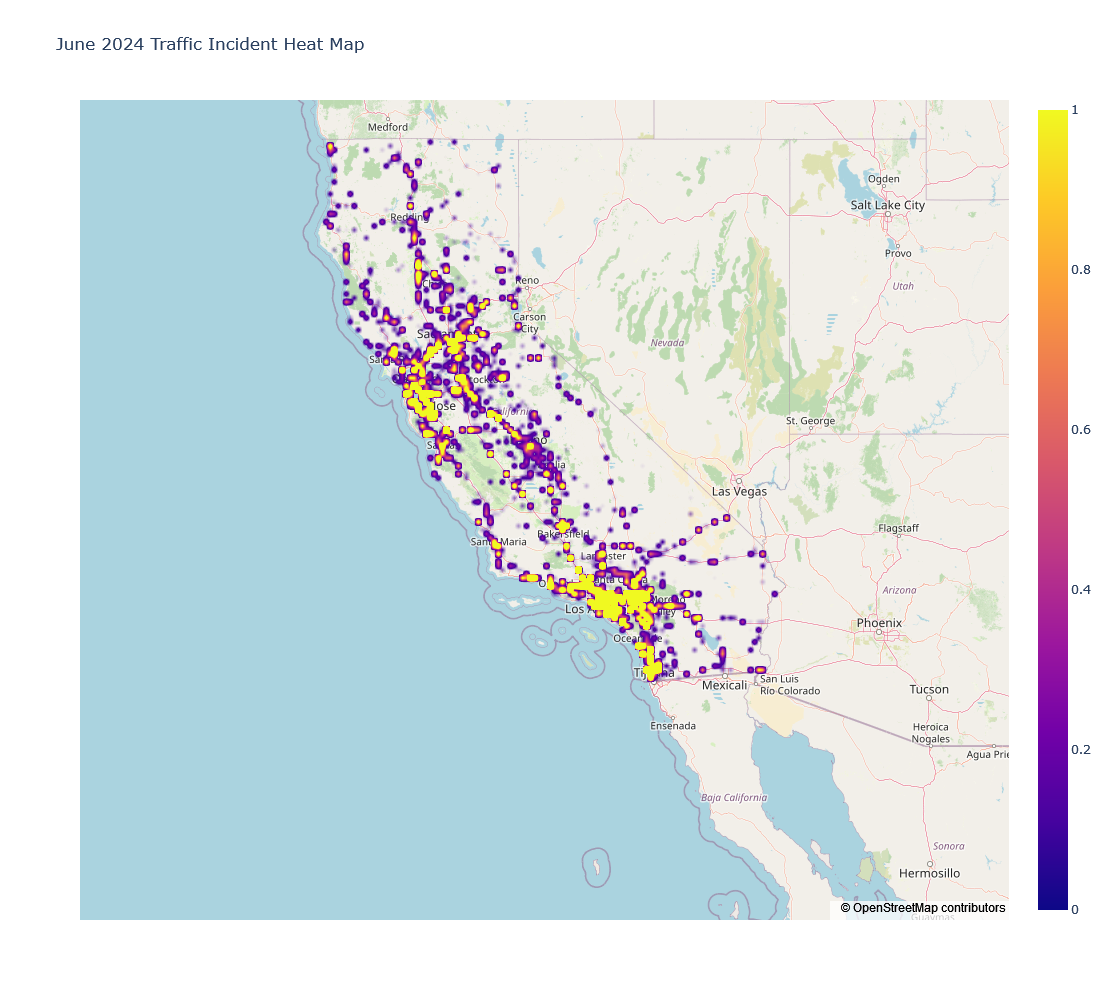

In [5]:
#heatmaps for 2024
#heatmap(heatmap_df(1,1),"January 2024 Traffic Incident Heat Map","January 2024 Traffic Incident Heat Map.html")
#heatmap(heatmap_df(1,2),"February 2024 Traffic Incident Heat Map,","February 2024 Traffic Incident Heat Map.html")
#heatmap(heatmap_df(1,3),"March 2024 Traffic Incident Heat Map","March 2024 Traffic Incident Heat Map.html")
#heatmap(heatmap_df(1,4),"April 2024 Traffic Incident Heat Map","April 2024 Traffic Incident Heat Map.html")
#heatmap(heatmap_df(1,5),"May 2024 Traffic Incident Heat Map","May 2024 Traffic Incident Heat Map.html")
heatmap(heatmap_df(1,6),"June 2024 Traffic Incident Heat Map","June 2024 Traffic Incident Heat Map.html")
